In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams["figure.figsize"]=(20,10)

In [ ]:
# Fixed path to use local housing.csv file
df=pd.read_csv('housing.csv')
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [4]:
df.shape

(13320, 9)

In [5]:
print("Original DataFrame:")
print(df.head())

# Drop specified columns
columns_to_drop = ['area_type', 'society', 'availability']
df1 = df.drop(columns_to_drop, axis='columns')

# Print the new dataframe after dropping columns
print("\nDataFrame after dropping columns:")
print(df1.head())

Original DataFrame:
              area_type   availability                  location       size  \
0  Super built-up  Area         19-Dec  Electronic City Phase II      2 BHK   
1            Plot  Area  Ready To Move          Chikka Tirupathi  4 Bedroom   
2        Built-up  Area  Ready To Move               Uttarahalli      3 BHK   
3  Super built-up  Area  Ready To Move        Lingadheeranahalli      3 BHK   
4  Super built-up  Area  Ready To Move                  Kothanur      2 BHK   

   society total_sqft  bath  balcony   price  
0  Coomee        1056   2.0      1.0   39.07  
1  Theanmp       2600   5.0      3.0  120.00  
2      NaN       1440   2.0      3.0   62.00  
3  Soiewre       1521   3.0      1.0   95.00  
4      NaN       1200   2.0      1.0   51.00  

DataFrame after dropping columns:
                   location       size total_sqft  bath  balcony   price
0  Electronic City Phase II      2 BHK       1056   2.0      1.0   39.07
1          Chikka Tirupathi  4 Bedroom    

In [6]:
df1.isnull().sum()

location        1
size           16
total_sqft      0
bath           73
balcony       609
price           0
dtype: int64

In [7]:
df2=df1.dropna()
df2.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
balcony       0
price         0
dtype: int64

In [8]:
df2['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '3 Bedroom', '1 BHK', '1 RK',
       '4 BHK', '1 Bedroom', '2 Bedroom', '6 Bedroom', '8 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '11 Bedroom', '43 Bedroom',
       '14 BHK', '8 BHK', '12 Bedroom', '10 Bedroom', '13 BHK'],
      dtype=object)

In [9]:
df2['bhk']=df2['size'].apply(lambda x:int(x.split(' ')[0]))

C:\Users\HP\AppData\Local\Temp\ipykernel_4996\3716419620.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['bhk']=df2['size'].apply(lambda x:int(x.split(' ')[0]))


In [10]:
df2.head()

,location,size,total_sqft,bath,balcony,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,3.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,1.0,51.00,2


In [11]:
df2['bhk'].unique()

array([ 2,  4,  3,  1,  6,  8,  7,  5, 11,  9, 27, 43, 14, 12, 10, 13],
      dtype=int64)

In [12]:
df2[df2.bhk>20]

,location,size,total_sqft,bath,balcony,price,bhk
1718,2Electronic City Phase II,27 BHK,8000,27.0,0.0,230.0,27
4684,Munnekollal,43 Bedroom,2400,40.0,0.0,660.0,43


In [13]:
df2.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [14]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [15]:
df2[~df2['total_sqft'].apply(is_float)].head(40)

,location,size,total_sqft,bath,balcony,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,0.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,0.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,0.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,0.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,0.0,56.800,2
410,Kengeri,1 BHK,34.46Sq. Meter,1.0,0.0,18.500,1
549,Hennur Road,2 BHK,1195 - 1440,2.0,0.0,63.770,2
661,Yelahanka,2 BHK,1120 - 1145,2.0,0.0,48.130,2
672,Bettahalsoor,4 Bedroom,3090 - 5002,4.0,0.0,445.000,4
772,Banashankari Stage VI,2 BHK,1160 - 1195,2.0,0.0,59.935,2


In [16]:
def convert_sqft_to_num(x):
    token=x.split('-')
    if len(token)==2:
        return(float(token[0])+float(token[1]))/2
    try:
        return float(x)
    except:
        return None

In [17]:
df2['total_sqft']=df2['total_sqft'].apply(convert_sqft_to_num)

C:\Users\HP\AppData\Local\Temp\ipykernel_4996\995833837.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['total_sqft']=df2['total_sqft'].apply(convert_sqft_to_num)


In [18]:
df2.head(40)

,location,size,total_sqft,bath,balcony,price,bhk
0,Electronic City Phase II,2 BHK,1056.00,2.0,1.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.00,5.0,3.0,120.00,4
2,Uttarahalli,3 BHK,1440.00,2.0,3.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.00,3.0,1.0,95.00,3
4,Kothanur,2 BHK,1200.00,2.0,1.0,51.00,2
5,Whitefield,2 BHK,1170.00,2.0,1.0,38.00,2
8,Marathahalli,3 BHK,1310.00,3.0,1.0,63.25,3
10,Whitefield,3 BHK,1800.00,2.0,2.0,70.00,3
11,Whitefield,4 Bedroom,2785.00,5.0,3.0,295.00,4
12,7th Phase JP Nagar,2 BHK,1000.00,2.0,1.0,38.00,2


In [19]:
df3=df2.copy()
df3['pricepersqft']=df3['price']*100000/df3['total_sqft']
df3.head()

,location,size,total_sqft,bath,balcony,price,bhk,pricepersqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,1.0,51.00,2,4250.000000


In [20]:
len(df3.location.unique())

1265

In [21]:
df3.location=df3.location.apply(lambda x:x.strip())

location_stats=df3.groupby('location')['location'].agg('count').sort_values(ascending=False)
location_stats

location
Whitefield              515
Sarjapur  Road          372
Electronic City         302
Kanakpura Road          261
Thanisandra             234
                       ... 
Kanakapura  Rod           1
Kanakapura Main Road      1
Kanakapura Road           1
Kanakapura Road,          1
whitefiled                1
Name: location, Length: 1254, dtype: int64

In [22]:
len(location_stats[location_stats<=10])

1017

In [23]:
location_stats_less_than_10=location_stats[location_stats<=10]

In [24]:
len(df3.location.unique())

1254

In [25]:
df3.location=df3.location.apply(lambda x: 'other' if x in location_stats_less_than_10 else x)
len(df3.location.unique())

238

In [26]:
df3.shape

(12710, 8)

In [27]:
df4=df3[~(df3.total_sqft/df3.bhk<300)]
df4.shape

(12055, 8)

In [28]:
df4.pricepersqft.describe()

count     12013.000000
mean       6206.082347
std        3985.518807
min         267.829813
25%        4199.363057
50%        5252.525253
75%        6823.529412
max      176470.588235
Name: pricepersqft, dtype: float64

In [29]:
def remove_pps_outliers(df):
    df_out=pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m=np.mean(subdf.pricepersqft)
        st=np.std(subdf.pricepersqft)
        reduced_df=subdf[(subdf.pricepersqft>(m-st))&(subdf.pricepersqft<=(m+st))]
        df_out=pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out


In [30]:
df4=remove_pps_outliers(df3)
df4.shape

(10817, 8)

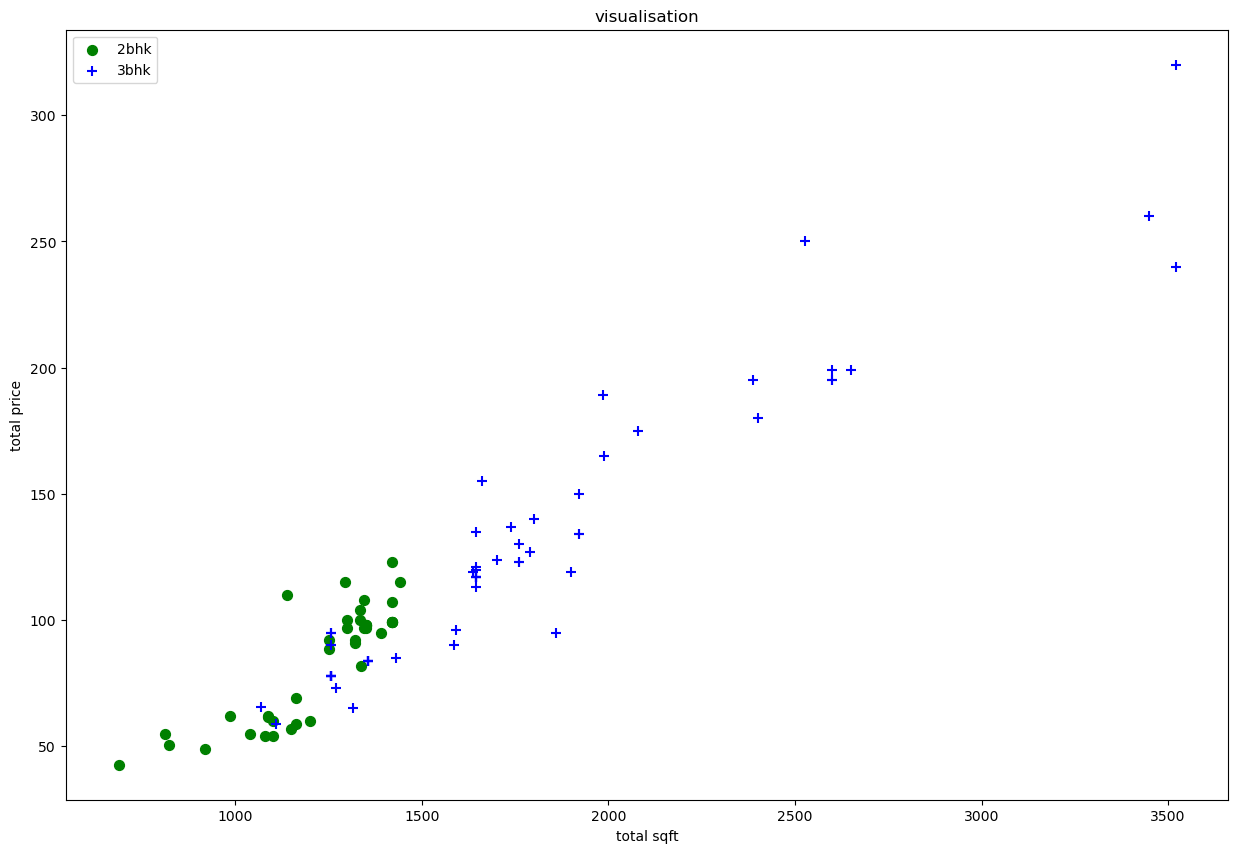

In [31]:
def plot_scatter_chart(df,location):
    bhk2=df[(df.location==location) & (df.bhk==2)]
    bhk3=df[(df.location==location) & (df.bhk==3)]
    matplotlib.rcParams['figure.figsize']=(15,10)
    plt.scatter(bhk2.total_sqft, bhk2.price, color='green',label='2bhk' ,s=50)
    plt.scatter(bhk3.total_sqft, bhk3.price, color='blue',label='3bhk', marker='+', s=50)
    plt.title("visualisation")
    plt.xlabel("total sqft")
    plt.ylabel("total price")
    plt.legend()



plot_scatter_chart(df4,"Hebbal")

In [32]:
def detect_outliers(data, threshold=3):

    mean = np.mean(data)
    std = np.std(data)
    
    z_scores = [(y - mean) / std for y in data]
    
    return [index for index, z in enumerate(z_scores) if abs(z) > threshold]
    

In [33]:
def remove_bhk_outliers(df):
    exclude_indices=np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats={}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk]={
                'mean' : np.mean(bhk_df.pricepersqft),
                'std' : np.std(bhk_df.pricepersqft),
                'count' : bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices=np.append(exclude_indices,bhk_df[bhk_df.pricepersqft<(stats['mean'])].index.values)
    
    return df.drop(exclude_indices,axis='index')


df5=remove_bhk_outliers(df4)
df5.shape

(7552, 8)

In [34]:
df5.head()

,location,size,total_sqft,bath,balcony,price,bhk,pricepersqft
0,1st Block Jayanagar,4 BHK,2850.0,4.0,1.0,428.0,4,15017.543860
1,1st Block Jayanagar,3 BHK,1630.0,3.0,2.0,194.0,3,11901.840491
2,1st Block Jayanagar,6 BHK,1200.0,6.0,2.0,125.0,6,10416.666667
3,1st Block Jayanagar,3 BHK,1875.0,2.0,3.0,235.0,3,12533.333333
4,1st Block Jayanagar,7 Bedroom,930.0,4.0,2.0,85.0,7,9139.784946


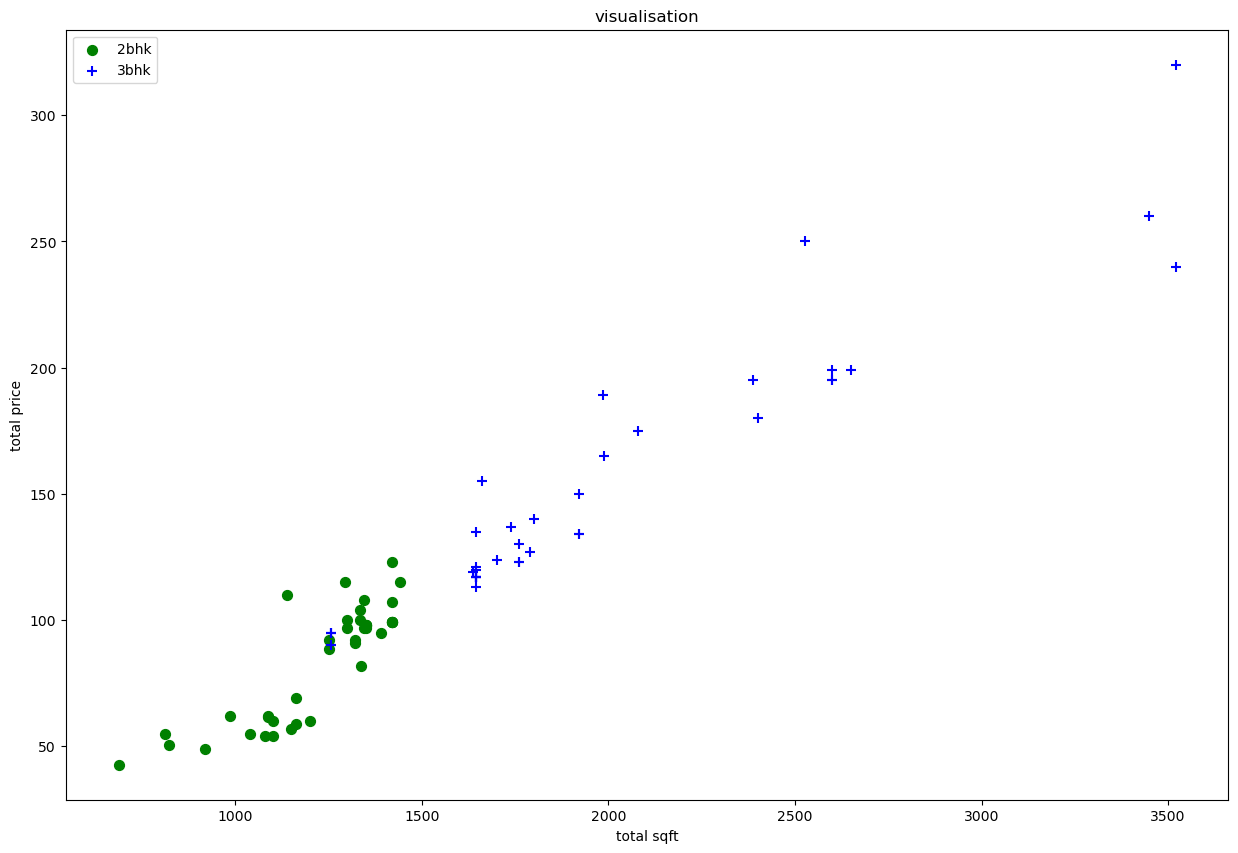

In [35]:
plot_scatter_chart(df5,"Hebbal")

Text(0, 0.5, 'Count')

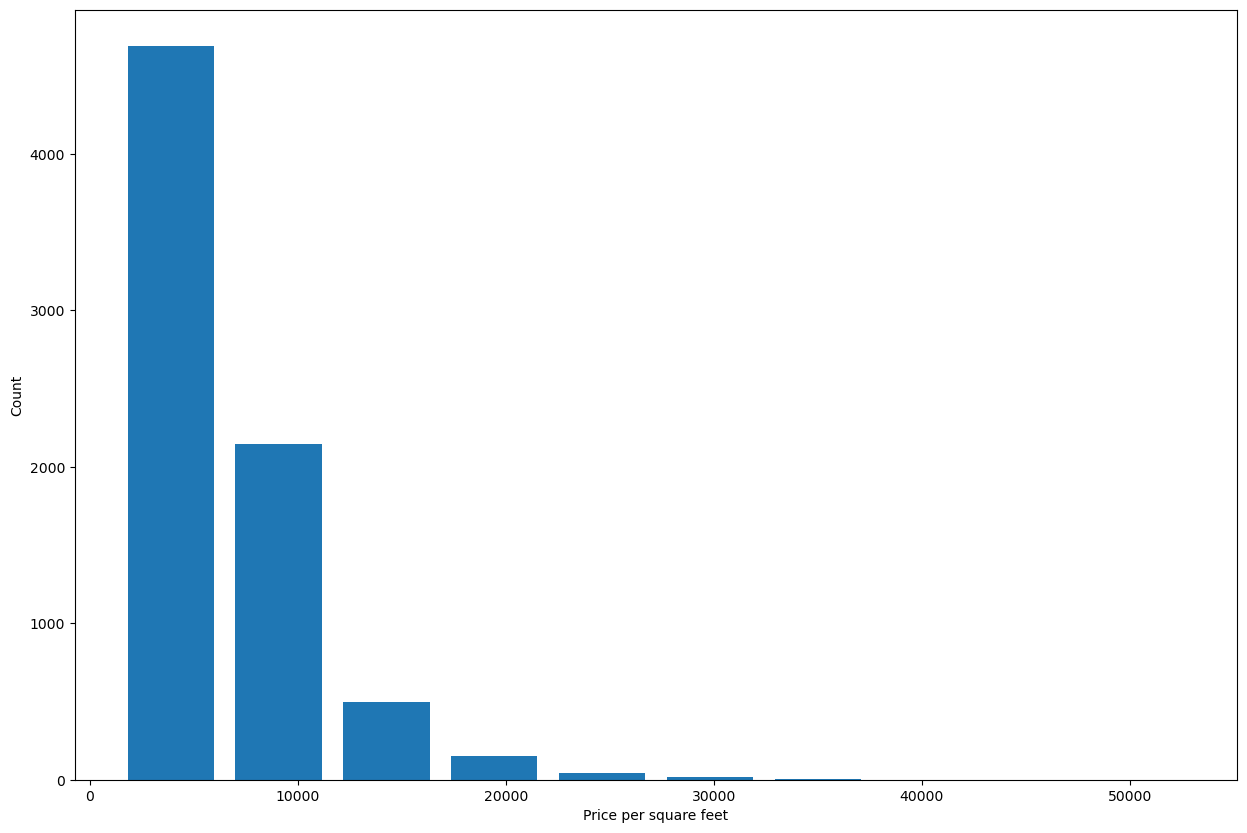

In [36]:
plt.hist(df5.pricepersqft,rwidth=0.8)
plt.xlabel("Price per square feet")
plt.ylabel("Count")

In [37]:
df5.bath.unique()

array([ 4.,  3.,  6.,  2.,  1.,  5.,  8.,  7.,  9., 10., 27., 11., 15.,
       13.])

In [38]:
df5[df5.bath>10]

,location,size,total_sqft,bath,balcony,price,bhk,pricepersqft
8451,other,27 BHK,8000.0,27.0,0.0,230.0,27,2875.000000
8460,other,11 Bedroom,1200.0,11.0,0.0,170.0,11,14166.666667
9100,other,14 BHK,1250.0,15.0,0.0,125.0,14,10000.000000
10107,other,13 BHK,5425.0,13.0,0.0,275.0,13,5069.124424


In [39]:
df5.bath.unique()

array([ 4.,  3.,  6.,  2.,  1.,  5.,  8.,  7.,  9., 10., 27., 11., 15.,
       13.])

In [40]:
df5[df5.bath>10]

,location,size,total_sqft,bath,balcony,price,bhk,pricepersqft
8451,other,27 BHK,8000.0,27.0,0.0,230.0,27,2875.000000
8460,other,11 Bedroom,1200.0,11.0,0.0,170.0,11,14166.666667
9100,other,14 BHK,1250.0,15.0,0.0,125.0,14,10000.000000
10107,other,13 BHK,5425.0,13.0,0.0,275.0,13,5069.124424


Text(0, 0.5, 'Count')

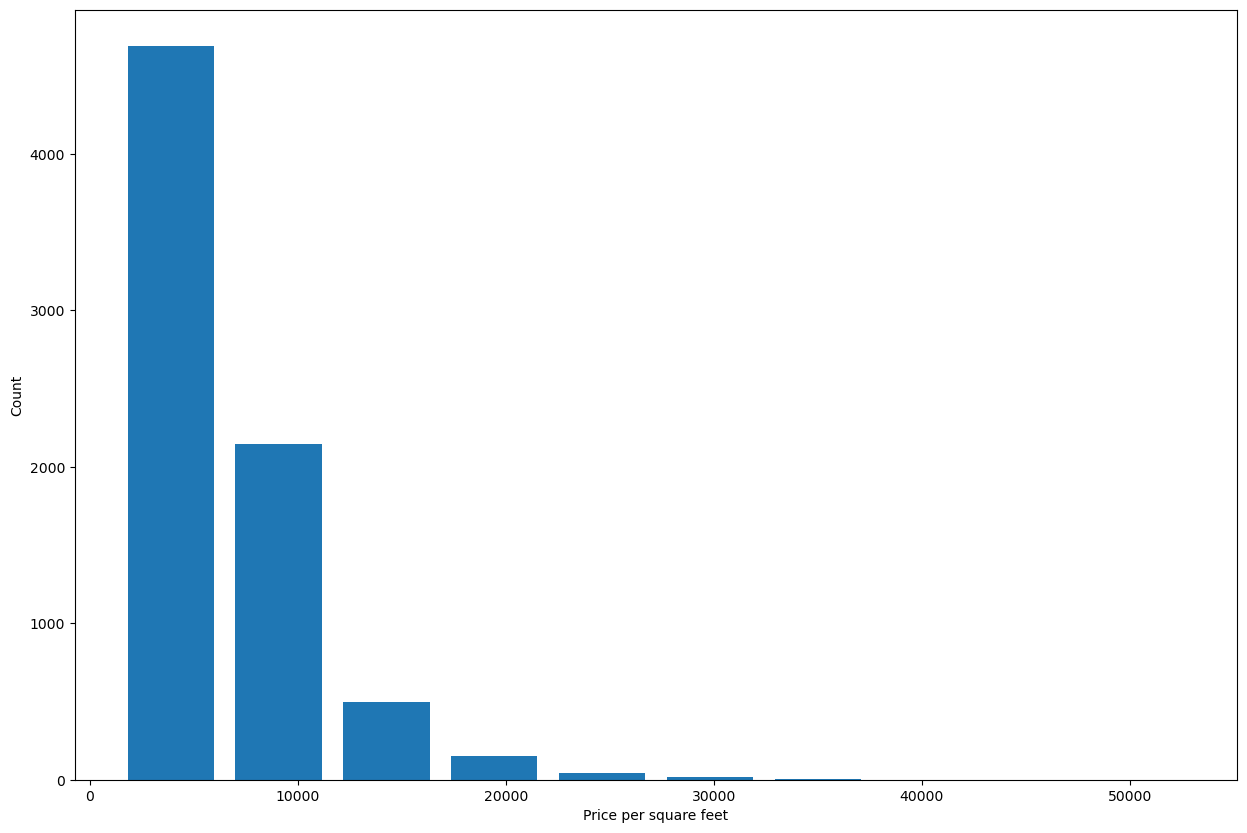

In [41]:
plt.hist(df5.pricepersqft,rwidth=0.8)
plt.xlabel("Price per square feet")
plt.ylabel("Count")

In [42]:
pd.get_dummies(df5.location)

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,AECS Layout,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10808,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10809,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10810,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10813,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [43]:
dummies=pd.get_dummies(df5.location)
dummies.head(3)

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,AECS Layout,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [44]:
df6=pd.concat([df5,dummies.drop('other',axis='columns')],axis='columns')
df6.head(3)


,location,size,total_sqft,bath,balcony,price,bhk,pricepersqft,1st Block Jayanagar,1st Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,4 BHK,2850.0,4.0,1.0,428.0,4,15017.543860,1,0,...,0,0,0,0,0,0,0,0,0,0
1,1st Block Jayanagar,3 BHK,1630.0,3.0,2.0,194.0,3,11901.840491,1,0,...,0,0,0,0,0,0,0,0,0,0
2,1st Block Jayanagar,6 BHK,1200.0,6.0,2.0,125.0,6,10416.666667,1,0,...,0,0,0,0,0,0,0,0,0,0


In [45]:
df7=df6.drop('location',axis='columns')
df7.head(30)

,size,total_sqft,bath,balcony,price,bhk,pricepersqft,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,4 BHK,2850.0,4.0,1.0,428.00,4,15017.543860,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3 BHK,1630.0,3.0,2.0,194.00,3,11901.840491,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6 BHK,1200.0,6.0,2.0,125.00,6,10416.666667,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3 BHK,1875.0,2.0,3.0,235.00,3,12533.333333,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,7 Bedroom,930.0,4.0,2.0,85.00,7,9139.784946,1,0,0,...,0,0,0,0,0,0,0,0,0,0
5,3 BHK,1200.0,2.0,0.0,130.00,3,10833.333333,1,0,0,...,0,0,0,0,0,0,0,0,0,0
6,2 BHK,1235.0,2.0,2.0,148.00,2,11983.805668,1,0,0,...,0,0,0,0,0,0,0,0,0,0
7,4 BHK,2750.0,4.0,0.0,413.00,4,15018.181818,1,0,0,...,0,0,0,0,0,0,0,0,0,0
8,4 BHK,2450.0,4.0,2.0,368.00,4,15020.408163,1,0,0,...,0,0,0,0,0,0,0,0,0,0
10,3 BHK,1875.0,3.0,1.0,167.00,3,8906.666667,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [46]:
df7.head()

,size,total_sqft,bath,balcony,price,bhk,pricepersqft,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,4 BHK,2850.0,4.0,1.0,428.0,4,15017.543860,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3 BHK,1630.0,3.0,2.0,194.0,3,11901.840491,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6 BHK,1200.0,6.0,2.0,125.0,6,10416.666667,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3 BHK,1875.0,2.0,3.0,235.0,3,12533.333333,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,7 Bedroom,930.0,4.0,2.0,85.0,7,9139.784946,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [47]:
X=df7.drop('price',axis='columns')
X.head(3)

,size,total_sqft,bath,balcony,bhk,pricepersqft,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,4 BHK,2850.0,4.0,1.0,4,15017.543860,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3 BHK,1630.0,3.0,2.0,3,11901.840491,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6 BHK,1200.0,6.0,2.0,6,10416.666667,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [48]:
def convert_bhk_to_num(x):
   """   token=x.split('-')
    if len(token)==2:
        return(float(token[0])+float(token[1]))/2
    try:
        return float(x)
    except:
        return None """
   
   token=x.split(' ')
   if len(token)==2:
        return token[0]
   
df8=df7.copy()
df8['size']=df8['size'].apply(convert_bhk_to_num)
df8.head(5)

,size,total_sqft,bath,balcony,price,bhk,pricepersqft,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,4,2850.0,4.0,1.0,428.0,4,15017.543860,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3,1630.0,3.0,2.0,194.0,3,11901.840491,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,1200.0,6.0,2.0,125.0,6,10416.666667,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,1875.0,2.0,3.0,235.0,3,12533.333333,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,7,930.0,4.0,2.0,85.0,7,9139.784946,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [49]:
df9=df8.drop('size',axis='columns')

In [50]:
df10=df9.drop('balcony',axis='columns')

In [51]:
df11=df10.drop('pricepersqft',axis='columns')

In [52]:
X=df11.drop('price',axis='columns')
X.head(5)

,total_sqft,bath,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,4,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1200.0,6.0,6,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1875.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,930.0,4.0,7,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [53]:
y=df11.price
y.head()

0    428.0
1    194.0
2    125.0
3    235.0
4     85.0
Name: price, dtype: float64

In [54]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=10)

In [55]:
from sklearn.linear_model import LinearRegression

lr_clf=LinearRegression()
lr_clf.fit(X_train,y_train)



LinearRegression()

In [56]:
lr_clf.score(X_test,y_test)

0.708264726557909

In [57]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2,random_state=0)
cross_val_score(LinearRegression(),X,y,cv=cv)

array([0.73127205, 0.68537012, 0.64831198, 0.74754905, 0.64077429])

In [ ]:
import pandas as pd
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, KFold
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler

def find_best_model_using_gridsearch(X, y):
    """Finds the best model and hyperparameters using GridSearchCV or RandomizedSearchCV."""

    algos = {
        'linear_regression': {
            'model': LinearRegression(),
            'params': {
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [0.1, 0.5, 1, 2],
            }
        },
       
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion': ['squared_error', 'friedman_mse'],
                'max_depth': [3, 5, None]
            }
        },
        'random_forest': {
            'model': RandomForestRegressor(),
            'params': {
                'n_estimators': [100, 200],
                'max_depth': [3, 5]
            }
        },
        'svr': {
            'model': SVR(),
            'params': {
                'kernel': ['linear', 'rbf'],
                'C': [1, 10]
            }
        },
        
    }

    scores = []
    cv = KFold(n_splits=5, shuffle=True, random_state=42)  # Appropriate cross-validation for regression

    for algo_name, config in algos.items():
        if len(config['params']) <= 5:
            gs = GridSearchCV(config['model'], config['params'], cv=cv, n_jobs=-1, return_train_score=False)
        else:
            gs = RandomizedSearchCV(config['model'], config['params'], cv=cv, n_iter=20, n_jobs=-1, return_train_score=False)
        gs.fit(X, y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores, columns=['model', 'best_score', 'best_params'])

# Example usage (incorporate scaling and preprocessing as needed)
X_scaled = StandardScaler().fit_transform(X)
find_best_model_using_gridsearch(X_scaled, y)


#hyperparameter tuning

c:\Users\HP\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
15 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\HP\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\HP\anaconda3\Lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "c:\Users\HP\anaconda3\Lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "c:\Users\HP\anaconda3\Lib\site-packages\sklearn\utils\_p

,model,best_score,best_params
0,linear_regression,0.682152,{}
1,lasso,0.681799,{'alpha': 0.1}
2,decision_tree,0.646390,"{'criterion': 'friedman_mse', 'max_depth': 5}"
3,random_forest,0.667902,"{'max_depth': 5, 'n_estimators': 200}"
4,svr,0.614988,"{'C': 10, 'kernel': 'linear'}"


In [59]:
X.columns

Index(['total_sqft', 'bath', 'bhk', '1st Block Jayanagar',
       '1st Phase JP Nagar', '2nd Phase Judicial Layout',
       '2nd Stage Nagarbhavi', '5th Phase JP Nagar', '6th Phase JP Nagar',
       '7th Phase JP Nagar',
       ...
       'Vijayanagar', 'Vishveshwarya Layout', 'Vishwapriya Layout',
       'Vittasandra', 'Whitefield', 'Yelachenahalli', 'Yelahanka',
       'Yelahanka New Town', 'Yelenahalli', 'Yeshwanthpur'],
      dtype='object', length=240)

In [60]:
def predict_price(location,sqft,bath,bhk):
    loc_index=np.where(X.columns==location)[0][0]

    x=np.zeros(len(X.columns))
    x[0]=sqft
    x[1]=bath
    x[2]=bhk
    if loc_index>=0:
        x[loc_index]=1

    return lr_clf.predict([x])[0]

In [61]:
predict_price('1st Phase JP Nagar',3000,4,5)

c:\Users\HP\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


317.27893902527296

In [ ]:
import pickle
with open('banglore_home_prices_model.pickle','wb') as f:
    pickle.dump(lr_clf,f)

In [62]:
import json
columns={
    'data_columns' : [col.lower() for col in X.columns]

}

with open("columns.json","w") as f:
    f.write(json.dumps(columns))

In [63]:
X.columns

Index(['total_sqft', 'bath', 'bhk', '1st Block Jayanagar',
       '1st Phase JP Nagar', '2nd Phase Judicial Layout',
       '2nd Stage Nagarbhavi', '5th Phase JP Nagar', '6th Phase JP Nagar',
       '7th Phase JP Nagar',
       ...
       'Vijayanagar', 'Vishveshwarya Layout', 'Vishwapriya Layout',
       'Vittasandra', 'Whitefield', 'Yelachenahalli', 'Yelahanka',
       'Yelahanka New Town', 'Yelenahalli', 'Yeshwanthpur'],
      dtype='object', length=240)